In [20]:
import pandas as pd

fish_feature_df = pd.read_csv('train.csv', index_col=False)
fish_feature_df.head()

,LBP_0,LBP_1,LBP_2,LBP_3,LBP_4,LBP_5,LBP_6,LBP_7,LBP_8,LBP_9,...,Color_13_0,Color_13_1,Color_13_2,Color_14_0,Color_14_1,Color_14_2,Color_15_0,Color_15_1,Color_15_2,class_no
0,0.420184,0.052695,0.052399,0.066891,0.085664,0.062272,0.045067,0.048394,0.028668,0.137766,...,0.678636,0.654326,0.635766,0.514857,0.503274,0.485034,0.277494,0.346861,0.285540,1
1,0.517979,0.049846,0.042892,0.053659,0.071539,0.049135,0.037360,0.042931,0.025209,0.109452,...,0.640154,0.640667,0.569400,0.506817,0.511302,0.440265,0.264138,0.339603,0.302633,1
2,0.505414,0.046250,0.046994,0.062699,0.078144,0.052702,0.038899,0.037844,0.024163,0.106891,...,0.717030,0.711388,0.685226,0.530973,0.525768,0.484916,0.234015,0.299792,0.216230,1
3,0.523845,0.041358,0.045538,0.066808,0.091041,0.057090,0.037513,0.030635,0.017496,0.088677,...,0.624660,0.641230,0.595396,0.437370,0.447427,0.386153,0.271007,0.315762,0.239302,1
4,0.518218,0.039286,0.048052,0.079834,0.105051,0.060642,0.031818,0.028355,0.013835,0.074910,...,0.625843,0.635324,0.593603,0.485896,0.488644,0.431445,0.287035,0.346546,0.260569,1


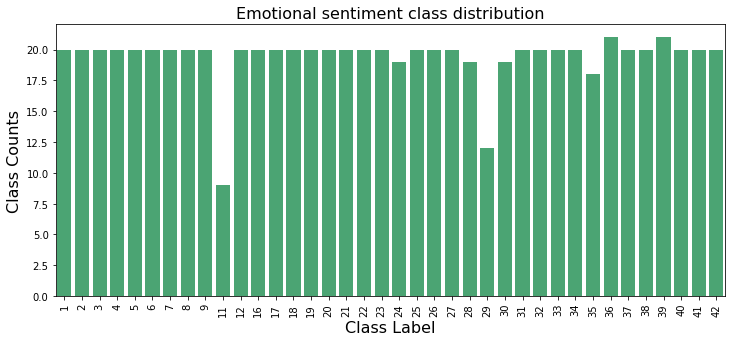

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.countplot(x=fish_feature_df.class_no, color='mediumseagreen')
plt.title('Emotional sentiment class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

In [22]:
label_df = fish_feature_df['class_no']
fish_feature_df.drop('class_no', axis = 1, inplace=True)
fish_feature_df.head()

,LBP_0,LBP_1,LBP_2,LBP_3,LBP_4,LBP_5,LBP_6,LBP_7,LBP_8,LBP_9,...,Color_12_2,Color_13_0,Color_13_1,Color_13_2,Color_14_0,Color_14_1,Color_14_2,Color_15_0,Color_15_1,Color_15_2
0,0.420184,0.052695,0.052399,0.066891,0.085664,0.062272,0.045067,0.048394,0.028668,0.137766,...,0.761996,0.678636,0.654326,0.635766,0.514857,0.503274,0.485034,0.277494,0.346861,0.285540
1,0.517979,0.049846,0.042892,0.053659,0.071539,0.049135,0.037360,0.042931,0.025209,0.109452,...,0.633753,0.640154,0.640667,0.569400,0.506817,0.511302,0.440265,0.264138,0.339603,0.302633
2,0.505414,0.046250,0.046994,0.062699,0.078144,0.052702,0.038899,0.037844,0.024163,0.106891,...,0.757133,0.717030,0.711388,0.685226,0.530973,0.525768,0.484916,0.234015,0.299792,0.216230
3,0.523845,0.041358,0.045538,0.066808,0.091041,0.057090,0.037513,0.030635,0.017496,0.088677,...,0.707868,0.624660,0.641230,0.595396,0.437370,0.447427,0.386153,0.271007,0.315762,0.239302
4,0.518218,0.039286,0.048052,0.079834,0.105051,0.060642,0.031818,0.028355,0.013835,0.074910,...,0.695300,0.625843,0.635324,0.593603,0.485896,0.488644,0.431445,0.287035,0.346546,0.260569


In [23]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

pl_random_forest = Pipeline(steps=[('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest, fish_feature_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for RandomForest : ', scores.mean())

/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20

Accuracy for RandomForest :  0.18005822828931822
CPU times: user 1.03 s, sys: 9.26 ms, total: 1.03 s
Wall time: 1.03 s


In [24]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pl_log_reg = Pipeline(steps=[('scaler',StandardScaler()),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg, fish_feature_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression: ', scores.mean())

/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conve

Accuracy for Logistic Regression:  0.3032234343360013
CPU times: user 50.2 s, sys: 1.54 s, total: 51.8 s
Wall time: 49.7 s


/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(fish_feature_df)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)


Explained Variance ratio by Principal Component  1  :  0.20623037428867044
Explained Variance ratio by Principal Component  2  :  0.17034290560719745
Explained Variance ratio by Principal Component  3  :  0.12582393047934953
Explained Variance ratio by Principal Component  4  :  0.04319967100931926
Explained Variance ratio by Principal Component  5  :  0.03680845454119081
Explained Variance ratio by Principal Component  6  :  0.02708250085584471
Explained Variance ratio by Principal Component  7  :  0.026006826569377372
Explained Variance ratio by Principal Component  8  :  0.01628799172578452
Explained Variance ratio by Principal Component  9  :  0.015527024961268048
Explained Variance ratio by Principal Component  10  :  0.013695847284873695
Explained Variance ratio by Principal Component  11  :  0.012927514716528456
Explained Variance ratio by Principal Component  12  :  0.011807025358359502
Explained Variance ratio by Principal Component  13  :  0.011575957209027389
Explained Varia

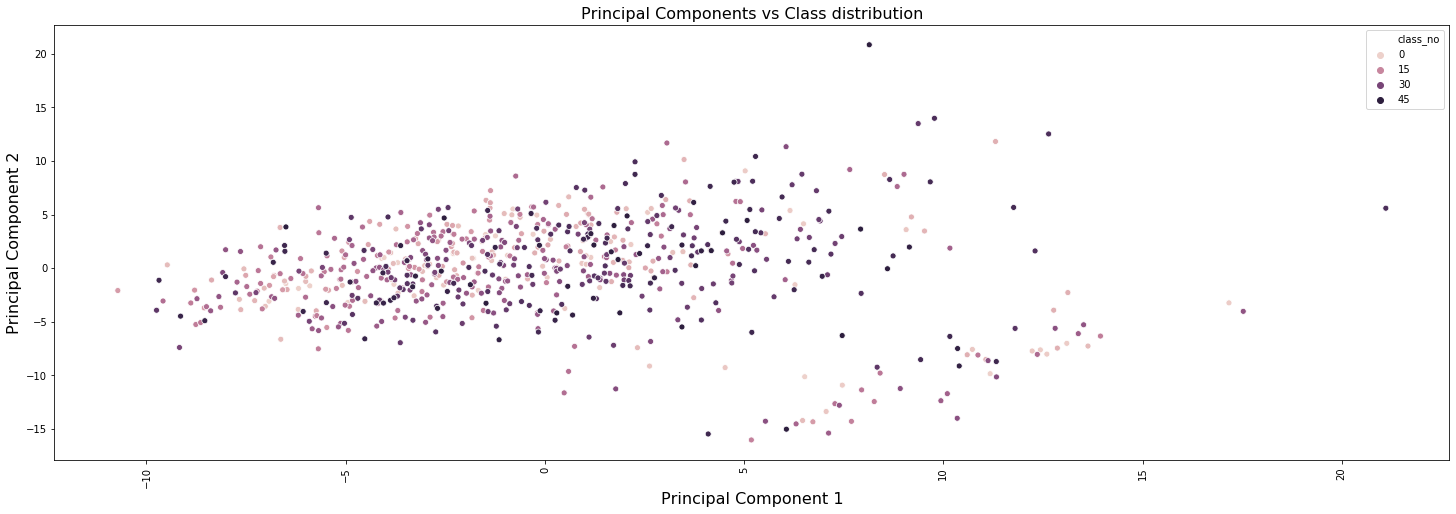

In [14]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=label_df)
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

In [15]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pl_log_reg_pca = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 2)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca, fish_feature_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 2 Principal Components: ', scores.mean())

/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conve

Accuracy for Logistic Regression with 2 Principal Components:  0.05037017415456964
CPU times: user 5.6 s, sys: 1.9 s, total: 7.5 s
Wall time: 4.47 s


/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [16]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pl_log_reg_pca_10 = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca', PCA(n_components = 10)),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores = cross_val_score(pl_log_reg_pca_10, fish_feature_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Logistic Regression with 10 Principal Components: ', scores.mean())

/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conve

Accuracy for Logistic Regression with 10 Principal Components:  0.18833925852865696
CPU times: user 8.34 s, sys: 1.86 s, total: 10.2 s
Wall time: 7.1 s


/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [17]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

pl_mlp = Pipeline(steps=[('scaler',StandardScaler()),
                             ('mlp_ann', MLPClassifier(hidden_layer_sizes=(1275, 637)))])
scores = cross_val_score(pl_mlp, fish_feature_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for ANN : ', scores.mean())

/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy for ANN :  0.31603185552917534
CPU times: user 13min 2s, sys: 4min 37s, total: 17min 39s
Wall time: 4min 26s


In [18]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

pl_svm = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pl_svm', LinearSVC())])
scores = cross_val_score(pl_svm, fish_feature_df, label_df, cv=10,scoring='accuracy')
print('Accuracy for Linear SVM : ', scores.mean())

/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ccc

Accuracy for Linear SVM :  0.2319838166330126
CPU times: user 13.4 s, sys: 1.66 s, total: 15.1 s
Wall time: 12.3 s


/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [19]:
%%time

import xgboost as xgb

pl_xgb = Pipeline(steps=
                  [('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])
scores = cross_val_score(pl_xgb, fish_feature_df, label_df, cv=10)
print('Accuracy for XGBoost Classifier : ', scores.mean())

/home/ccc/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy for XGBoost Classifier :  0.29382144695069057
CPU times: user 2min 53s, sys: 435 ms, total: 2min 54s
Wall time: 2min 55s
